# COVER TYPE ANALYSIS - Multi-Class Classification and Feature Selection Notebook

SharpestMinds Project by Angela Teng with the mentorship of Jeremie Harris

**Completed:** 
- Loading data + importing libraries 
- Exploratory Data Analysis 

**To Do:**
- Data Cleaning 
- Feature Selection 
- Dimensionality Reduction 
- Modeling 
- Analysis 
- Polish 

## Importing Libraries + Loading Data

In [40]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#import sklearn.cross_validation as cross_validation
#from sklearn.cross_validation import train_test_split
import sklearn.model_selection as model_selection
from sklearn import linear_model

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from sklearn.neighbors import KNeighborsClassifier

from random import sample

In [41]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [42]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [43]:
data = open("covtype.data")
data

<_io.TextIOWrapper name='covtype.data' mode='r' encoding='UTF-8'>

In [44]:
data = pd.read_csv("covtype.data", header=None)
#interesting that read csv also works on .data files! 

In [45]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [46]:
data.columns = cols
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


**Goal: predict cover type given the other variables (7 cover types )**

In [47]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Soil_Type_39       \
               75%     max     count        mean  ...          75%  max   
Cover_Type                                        ...                     
1           3235.0  3686.0  211840.0  156.138227  ...          0.0  1.0   
2           3042.0  3433.0  283301.0  152.060515  ...          0.0  1.0   
3           2549.0  2899.0   35754.0  176.372490  ...          0.0  0.0   
4           2304.0  2526.0    2747.0  137.139425  ...          0.0  0.0   
5           2857.0  3011.0    9493.0  139.283051  ...          0.0  0.0   
6           2544.0  2900.0   17367.0  180.539068  ...          0.0  0.0   
7           3409.0  3858.0   20510.0  153.236226  ...          1.0  1.0   

           Soil_Type_40                                               
                  count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                            
1              211840.0  0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2              283301.0  0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3               35754.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                2747.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5                9493.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6               17367.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7               20510.0  0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [49]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [50]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


In [51]:
#variable importance by correlation
cov_type_corr = data.corr()['Cover_Type'][:-1]

In [52]:
cov_type_corr

elevation                            -0.269554
aspect                                0.017080
slope                                 0.148285
horizontal_distance_to_hydrology     -0.020317
vertical_distance_to_hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Wilderness_Area_1                    -0.203913
Wilderness_Area_2                    -0.048059
Wilderness_Area_3                     0.066846
Wilderness_Area_4                     0.323200
Soil_Type_1                           0.090828
Soil_Type_2                           0.118135
Soil_Type_3                           0.068064
Soil_Type_4                           0.099672
Soil_Type_5                           0.077890
Soil_Type_6                           0.112958
Soil_Type_7                          -0.000496
Soil_Type_8  

In [53]:
golden_features_list = cov_type_corr[abs(cov_type_corr) > 0.1].sort_values(ascending=False)
print("There are {} somewhat correlated values with Cover Type:\n{}".format(len(golden_features_list), golden_features_list))

There are 15 somewhat correlated values with Cover Type:
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Horizontal_Distance_To_Fire_Points   -0.108936
Soil_Type_29                         -0.124933
Soil_Type_23                         -0.135055
Soil_Type_22                         -0.141746
Horizontal_Distance_To_Roadways      -0.153450
Wilderness_Area_1                    -0.203913
elevation                            -0.269554
Name: Cover_Type, dtype: float64


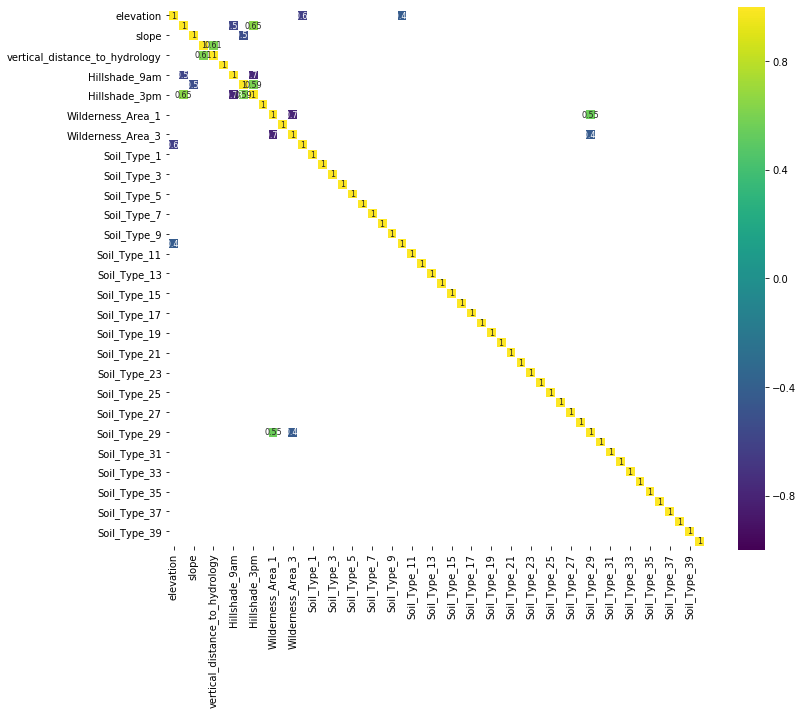

In [14]:
corr = data.drop('Cover_Type', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Sampling the Population

In [15]:
# do you sample before you normalize? and log transform? or after

- df4 = dataframe with all variables, including cover_type and cover_type OHE
- df_dummy = df with only dummy vars, no cover_type
- data - raw data 

In [54]:
#dataframe with dummy variables for covertype
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


In [55]:
df_dummy = df4
df_dummy = df_dummy.drop(['Cover_Type'], axis=1)
df_dummy.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#sanity check
#df_dummy.columns

In [56]:
#sample(df_dummy['1'], 1000)
#sample(df_dummy, 1000)
#df_dummy.sample(1000)

# select a random sample of 1000 entries per cover type
CV1 = df_dummy[df_dummy[1]==1].sample(1000)
CV2 = df_dummy[df_dummy[2]==1].sample(1000)
CV3 = df_dummy[df_dummy[3]==1].sample(1000)
CV4 = df_dummy[df_dummy[4]==1].sample(1000)
CV5 = df_dummy[df_dummy[5]==1].sample(1000)
CV6 = df_dummy[df_dummy[6]==1].sample(1000)
CV7 = df_dummy[df_dummy[7]==1].sample(1000)

CV1.head()
CV2.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
457594,0,1,0,0,0,0,0,3334,327,15,...,0,0,0,0,0,0,0,0,0,1
308676,0,1,0,0,0,0,0,2497,269,20,...,0,0,0,0,0,0,0,0,0,0
439879,0,1,0,0,0,0,0,3055,126,25,...,0,0,1,0,0,0,0,0,0,0
373725,0,1,0,0,0,0,0,3112,13,18,...,0,0,0,0,0,0,0,0,0,0
31722,0,1,0,0,0,0,0,2880,35,8,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# concatenate those 1000 entries to get a sample size of 7000
# need to make sure to de-dupe this 
sample = pd.concat((CV1, CV2, CV3, CV4, CV5, CV6, CV7), axis=0)
sample.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
270366,1,0,0,0,0,0,0,3018,150,19,...,0,0,0,0,0,0,0,0,0,0
295209,1,0,0,0,0,0,0,2951,89,26,...,0,0,0,0,0,0,0,0,0,0
268325,1,0,0,0,0,0,0,3081,103,18,...,0,0,0,0,0,0,0,0,0,0
428462,1,0,0,0,0,0,0,2983,348,14,...,0,0,1,0,0,0,0,0,0,0
460472,1,0,0,0,0,0,0,2973,190,11,...,0,0,0,0,0,0,0,0,0,0


In [58]:
sample.shape

(7000, 61)

In [59]:
# group cover type 1 &2 togehter, then everything else
#(df4.head()) 
#want to keep categorical but also dummy 

CV_d1 = df4[df4[1]==1].sample(1000)
CV_d2 = df4[df4[2]==1].sample(1000)
CV_d3 = df4[df4[3]==1].sample(1000)
CV_d4 = df4[df4[4]==1].sample(1000)
CV_d5 = df4[df4[5]==1].sample(1000)
CV_d6 = df4[df4[6]==1].sample(1000)
CV_d7 = df4[df4[7]==1].sample(1000)
#sample
CV_d7.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
517500,0,0,0,0,0,0,1,3396,128,11,...,0,0,0,0,0,0,0,1,0,7
344101,0,0,0,0,0,0,1,3313,28,18,...,0,0,0,0,0,1,0,0,0,7
541289,0,0,0,0,0,0,1,3471,277,18,...,0,0,0,0,0,0,0,1,0,7
354932,0,0,0,0,0,0,1,3445,207,3,...,0,0,0,1,0,0,0,0,0,7
212797,0,0,0,0,0,0,1,3245,172,7,...,0,0,0,0,0,0,0,0,0,7


In [60]:
sample_set = pd.concat((CV_d1, CV_d2, CV_d3, CV_d4, CV_d5, CV_d6, CV_d7), axis=0)
sample_set.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
360496,1,0,0,0,0,0,0,2996,106,21,...,0,0,0,0,0,0,0,0,0,1
157236,1,0,0,0,0,0,0,3035,256,9,...,0,0,0,0,0,0,0,0,0,1
65257,1,0,0,0,0,0,0,3132,108,8,...,0,0,0,0,0,0,0,0,0,1
166293,1,0,0,0,0,0,0,2856,113,12,...,0,0,0,0,0,0,0,0,0,1
154058,1,0,0,0,0,0,0,2977,224,13,...,0,0,0,0,0,0,0,0,0,1


In [61]:
sample_set.groupby('Cover_Type').describe()

1                                          2       ...  \
             count mean  std  min  25%  50%  75%  max   count mean  ...   
Cover_Type                                                          ...   
1           1000.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1000.0  0.0  ...   
2           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  1.0  ...   
3           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  0.0  ...   
4           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  0.0  ...   
5           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  0.0  ...   
6           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  0.0  ...   
7           1000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1000.0  0.0  ...   

           Soil_Type_39      Soil_Type_40                                  \
                    75%  max        count   mean       std  min  25%  50%   
Cover_Type                                                                  
1                   0.0  1.0       1000.0  0.019  0.136593  0.0  0.0  0.0   
2                   0.0  0.0       1000.0  0.001  0.031623  0.0  0.0  0.0   
3                   0.0  0.0       1000.0  0.000  0.000000  0.0  0.0  0.0   
4                   0.0  0.0       1000.0  0.000  0.000000  0.0  0.0  0.0   
5                   0.0  0.0       1000.0  0.000  0.000000  0.0  0.0  0.0   
6                   0.0  0.0       1000.0  0.000  0.000000  0.0  0.0  0.0   
7                   1.0  1.0       1000.0  0.172  0.377569  0.0  0.0  0.0   

                      
            75%  max  
Cover_Type            
1           0.0  1.0  
2           0.0  1.0  
3           0.0  0.0  
4           0.0  0.0  
5           0.0  0.0  
6           0.0  0.0  
7           0.0  1.0  

[7 rows x 488 columns]

In [62]:
sample_set.groupby('Cover_Type').mean()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,3122.485,150.682,12.953,...,0.059,0.088,0.078,0.001,0.006,0.000,0.000,0.040,0.041,0.019
2,0,1,0,0,0,0,0,2922.537,153.074,13.110,...,0.034,0.087,0.091,0.003,0.000,0.000,0.000,0.002,0.000,0.001
3,0,0,1,0,0,0,0,2389.047,182.894,21.155,...,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0,0,0,1,0,0,0,2222.286,136.076,18.477,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0,0,0,0,1,0,0,2788.231,139.001,16.737,...,0.035,0.034,0.059,0.002,0.000,0.000,0.000,0.000,0.000,0.000
6,0,0,0,0,0,1,0,2416.938,181.041,19.284,...,0.003,0.012,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0,0,0,0,0,0,1,3361.895,154.344,14.253,...,0.011,0.054,0.032,0.002,0.053,0.002,0.014,0.263,0.288,0.172


In [63]:
#split the data into training and testing
#how do you do this for multiclass logistic reg??
X=sample_set[list(sample_set.columns)[7:-1]]
print(X.shape)
X.head()


(7000, 54)


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
360496,2996,106,21,0,0,571,250,209,76,685,...,0,0,0,0,0,0,0,0,0,0
157236,3035,256,9,242,28,5707,199,246,185,1939,...,0,0,0,0,0,0,0,0,0,0
65257,3132,108,8,175,32,3746,233,232,130,4992,...,0,0,0,0,0,0,0,0,0,0
166293,2856,113,12,201,-48,1299,240,228,117,1782,...,0,0,0,0,0,0,0,0,0,0
154058,2977,224,13,67,10,4546,203,252,184,1911,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Y=sample_set[list(sample_set.columns)[0:7]]
print(Y.shape)
Y.head()




(7000, 7)


,1,2,3,4,5,6,7
360496,1,0,0,0,0,0,0
157236,1,0,0,0,0,0,0
65257,1,0,0,0,0,0,0
166293,1,0,0,0,0,0,0
154058,1,0,0,0,0,0,0


### Multi class classification with undersampling

In [66]:

from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)




Automatically created module for IPython interactive environment


In [67]:
RANDOM_STATE = 42



In [68]:
# set target data  and x values
X=data[list(data.columns)[:-1]]
print(X.shape)
X.head()

(581012, 54)


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y=data[list(data.columns)[-1]]
print(Y.shape)
Y.head()


(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [70]:
data.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

In [71]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

### Split into Training and Testing

In [72]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [73]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3: 767, 5: 766, 7: 764, 6: 752, 1: 738, 4: 733, 2: 730})
Testing target statistics: Counter({2: 270, 4: 267, 1: 262, 6: 248, 7: 236, 5: 234, 3: 233})


In [74]:
# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nearmiss',
                 NearMiss(n_jobs=1, n_neighbors=3, n_neighbors_ver3=3,
                          random_state=None, ratio=None, return_indices=False,
                          sampling_strategy='auto', version=2)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [75]:
# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00       262
          2       0.00      0.00      1.00      0.00      0.00      0.00       270
          3       0.00      0.00      1.00      0.00      0.00      0.00       233
          4       0.82      0.60      0.98      0.69      0.76      0.56       267
          5       0.57      0.02      1.00      0.03      0.13      0.02       234
          6       0.16      0.97      0.13      0.27      0.36      0.14       248
          7       1.00      0.04      1.00      0.07      0.20      0.03       236

avg / total       0.36      0.24      0.87      0.16      0.21      0.11      1750



### Feature Selection by Extra Trees Classifier for Decision Trees

In [77]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import ExtraTreesClassifier


In [79]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[1.57863370e-01 5.38865226e-02 4.35524367e-02 5.76494349e-02
 4.81670411e-02 7.28548960e-02 5.09111011e-02 4.55798888e-02
 4.67378716e-02 6.38341571e-02 2.84699025e-02 4.88358052e-03
 2.01035677e-02 5.35357936e-02 2.16963541e-03 9.57306002e-03
 2.04094897e-02 1.93263847e-02 1.82085720e-03 2.75811829e-03
 0.00000000e+00 1.94452543e-04 2.34139372e-04 2.92100979e-02
 4.69289085e-03 9.59906557e-03 5.99552312e-03 1.54535557e-03
 0.00000000e+00 1.89363719e-03 9.81468614e-03 8.09096482e-04
 8.27718231e-04 1.72970502e-03 3.40313988e-04 7.37672057e-03
 6.97779979e-03 3.67009792e-03 9.63622565e-05 1.52490840e-03
 6.08394846e-05 1.37437077e-04 7.57399160e-03 1.17919698e-02
 4.66574816e-03 5.03577582e-03 5.20040244e-03 5.15167128e-04
 4.02577449e-03 3.17672711e-04 1.68365535e-03 2.72432109e-02
 2.51407882e-02 1.59878861e-02]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:

# feature extraction of top 3 features
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Features:", (data.columns)[:-1])
print("Num of Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


In [ ]:
#feature_list = pd.DataFrame(columns = (data.columns)[:-1])
feature_list = list((data.columns)[:-1])
#feature_list

In [ ]:
included_features = list(fit.support_)

In [ ]:
feature_ranking = list(fit.ranking_)

In [ ]:
ft_df = {'Features': feature_list, "Included?": included_features, 'Ranking':feature_ranking }
list_of_log_features = pd.DataFrame(ft_df)
list_of_log_features.sort_values(by='Ranking')

In [ ]:
new_logreg_data = data[['Soil_Type_40','Soil_Type_38','Soil_Type_39','Wilderness_Area_1', 'Wilderness_Area_4', 'Cover_Type']]
new_logreg_data.head()

In [ ]:
# set target data  and x values
X=new_logreg_data[list(new_logreg_data.columns)[:-1]]
print(X.shape)
X.head()

In [ ]:
Y=new_logreg_data[list(new_logreg_data.columns)[-1]]
print(Y.shape)
Y.head()


In [ ]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

In [ ]:
#re-split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [ ]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')

In [ ]:
logreg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
logreg

In [ ]:
from sklearn import metrics
print ("Multinomial Logistic regression Train Accuracy:", metrics.accuracy_score(y_train, logreg.predict(X_train)))
print ("Multinomial Logistic regression Test Accuracy:", metrics.accuracy_score(y_test, logreg.predict(X_test)))

In [ ]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

In [ ]:
y_train

In [ ]:
#struggling with multiclass, so will start with logistic regression first for covertype 1 and 2

In [ ]:
#sample the data, 1000 per output
# set target data  and x values
X=data[list(data.columns)[:-1]]
#print(X.shape)
#X.head()
y=data[list(data.columns)[-1]]
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 0, 4:0, 5:0, 6:0, 7:0},
                      random_state=RANDOM_STATE)

In [ ]:
#re-split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [ ]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

#### Assumptions: 
- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regression requires quite large sample sizes.

In [ ]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit()
#print(result.summary2())
y_train

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#trying this with 3 dimensions so we can visualize what's happening 

In [ ]:
# feature extraction of top 3 features
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Features:", (data.columns)[:-1])
print("Num of Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


In [ ]:
#Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40'
new_logreg_data = data[['Soil_Type_40','Soil_Type_38','Soil_Type_39', 'Cover_Type']]
new_logreg_data.head()

In [ ]:
# set target data  and x values
X=new_logreg_data[list(new_logreg_data.columns)[:-1]]
print(X.shape)
X.head()

Y=new_logreg_data[list(new_logreg_data.columns)[-1]]
print(Y.shape)
Y.head()


In [ ]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

In [ ]:
#re-split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

In [ ]:
logreg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
logreg

In [ ]:

print ("Multinomial Logistic regression Train Accuracy:", metrics.accuracy_score(y_train, logreg.predict(X_train)))
print ("Multinomial Logistic regression Test Accuracy:", metrics.accuracy_score(y_test, logreg.predict(X_test)))

## Sources: 
**Data Sources and Documentation:**
- https://archive.ics.uci.edu/ml/datasets/Covertype
- http://rexa.info/paper/d44ba72ee840ac929fb2b78f6d9f6c6b408ff1da


**Extraction:** 
- https://realpython.com/python-string-split-concatenate-join/
- https://stackoverflow.com/questions/28595701/pandas-equivalent-of-rs-cbind-concatenate-stack-vectors-vertically
- https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
- https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
- https://www.guru99.com/reading-and-writing-files-in-python.html
- https://stackoverflow.com/questions/31797013/how-to-open-a-data-file-extension

**Exploration**:
- https://www.datacamp.com/community/tutorials/categorical-data
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas/29763653
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/tutorial/categorical.html
- Categorical Data https://www.datacamp.com/community/tutorials/categorical-data 
- https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
- https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
- https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://seaborn.pydata.org/generated/seaborn.clustermap.html
- https://stackoverflow.com/questions/42818670/pandas-dataframe-average-calculation
- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python




**General Syntax:**
- https://stackoverflow.com/questions/42202872/how-to-convert-list-to-row-dataframe-with-pandas
- https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
- https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column/42049158#42049158
- https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
- https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
- https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas 
- https://pbpython.com/categorical-encoding.html
- https://www.geeksforgeeks.org/python-random-sample-function/
- https://stackoverflow.com/questions/48841624/dataframe-object-has-no-attribute-ravel-when-transforming-target-variable

**Data Sampling:**
- https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
- https://github.com/dipanjanS/practical-machine-learning-with-python#contents


**Feature Selection:**
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
- PCA: 
    - https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
    - http://staskolenikov.net/talks/Gustavo-Stas-PCA-generic.pdf
    - https://www.researchgate.net/post/Should_I_use_PCA_with_categorical_data
    - https://stackoverflow.com/questions/40795141/pca-for-categorical-features
- Dimensionality Reduction: 
    - MCA: https://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb
    - https://pypi.org/project/mca/ 
    - https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
- https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63 
- https://www.kaggle.com/questions-and-answers/55494
- https://datascience.stackexchange.com/questions/36849/how-to-implement-feature-selection-for-categorical-variables-especially-with-ma

**Transformation:**
- Train test split: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
    - https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
    - http://scikit.ml/stratification.html

**Modeling:**
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://www.kdnuggets.com/2016/03/data-science-process.html
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- https://github.com/janeyin600/Data_analysis/blob/master/train_test_split.ipynb
- https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
- https://stats.stackexchange.com/questions/189760/two-ways-of-predicting-a-categorical-variable
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- Linear Regression: 
    - https://realpython.com/linear-regression-in-python/ 
    - https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
    - https://medium.com/coinmonks/multiple-regression-regression-part-2-aeffa1843073
- Softmax Regression: 
    - http://mccormickml.com/2014/06/13/deep-learning-tutorial-softmax-regression/
    - https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html
- Logistic Regression: 
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
    - https://stackoverflow.com/questions/36760000/python-how-to-use-multinomial-logistic-regression-using-sklearn
    - https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#example-plot-multilabel-py
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py
- https://discuss.analyticsvidhya.com/t/getting-an-error-valueerror-bad-input-shape-1906-38-when-applying-logistics-regression-model/19025
- https://scikit-learn.org/stable/modules/linear_model.html
- https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8




**Loading:**

### Questions: 
- how do I use RFE??? AttributeError: 'DataFrame' object has no attribute 'data'
- deep dive into explaining/understanding a correlation matrix
- Multiclass logistic regression: does this really only apply to 1 vs all? 